<a href="https://colab.research.google.com/github/TAMIDSpiyalong/Introduction-to-Machine-Learning-for-Energy/blob/main/quiz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np

# Metric

$\text{Precision} = \frac{\text{True Positives}}{\text{True Positives} + \text{False Positives}}
$

$\text{Recall} = \frac{\text{True Positives}}{\text{True Positives} + \text{False Negatives}}
$

In [ ]:
def precision_recall(y_true, y_pred):
    """
    Compute precision and recall given true labels and predicted labels.

    Arguments:
    y_true -- 1-D numpy array of true labels (binary: 0 or 1)
    y_pred -- 1-D numpy array of predicted labels (binary: 0 or 1)

    Returns:
    precision -- Precision score
    recall -- Recall score
    """
    true_positives = np.sum((y_true == 1) & (y_pred == 1))
    false_positives = np.sum((y_true == 0) & (y_pred == 1))
    false_negatives = np.sum((y_true == 1) & (y_pred == 0))

    precision = true_positives / (true_positives + false_positives + 1e-10)  # Adding a small epsilon to avoid division by zero
    recall = true_positives / (true_positives + false_negatives + 1e-10)

    return precision, recall

# Example usage:


# Generate example true labels and predicted labels
y_true = np.array([1, 0, 1, 1, 0, 1, 0, 0, 1, 1])
y_pred = np.array([1, 1, 1, 1, 0, 1, 0, 1, 1, 0])

precision, recall = precision_recall(y_true, y_pred)
print("Precision:", precision)
print("Recall:", recall)


Precision: 0.7142857142755102
Recall: 0.8333333333194445


# Cosine similarity

$\text{cosine_similarity}(\mathbf{a}, \mathbf{b}) = \frac{\mathbf{a} \cdot \mathbf{b}}{\|\mathbf{a}\| \|\mathbf{b}\|}
$

In [ ]:
import numpy as np

def cosine_similarity(a, b):
    """
    Compute cosine similarity between vectors a and b.

    Arguments:
    a, b -- 1-D numpy arrays

    Returns:
    cosine_sim -- Cosine similarity between a and b
    """
    dot_product = np.dot(a, b)
    norm_a = np.linalg.norm(a)
    norm_b = np.linalg.norm(b)
    cosine_sim = dot_product / (norm_a * norm_b)
    return cosine_sim

# Example usage:
vector1 = np.array([1, 2, 3])
vector2 = np.array([4, 5, 6])
print("Cosine similarity between vector1 and vector2:", cosine_similarity(vector1, vector2))


Cosine similarity between vector1 and vector2: 0.9746318461970762


In [ ]:
np.linalg.norm([2,3,1]),np.linalg.norm([1,2,0])

(3.7416573867739413, 2.23606797749979)

In [ ]:
(14**0.5)*(5**0.5)

8.366600265340756

In [ ]:
8/8.366600265340756

0.9561828874675149

In [ ]:
cosine_similarity([2,3,1], [1,2,0])

0.9561828874675149

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

# Define two vectors
vector_a = np.array([2, 3, 1]).reshape(1, -1)  # Reshape to ensure it's a row vector
vector_b = np.array([1, 2, 0]).reshape(1, -1)  # Reshape to ensure it's a row vector

# Compute cosine similarity
cosine_sim = cosine_similarity(vector_a, vector_b)

print("Cosine Similarity:", cosine_sim[0][0])


Cosine Similarity: 0.9561828874675149


# Softmax

$\text{softmax}(x_i) = \frac{e^{x_i}}{\sum_{j=1}^{N} e^{x_j}}$


In [1]:
import numpy as np

def softmax(x):
    """
    Compute softmax values for each sets of scores in x.

    Arguments:
    x -- A numpy array of any shape

    Returns:
    s -- A numpy array of the same shape as x, containing softmax values
    """
    # e_x = np.exp(x - np.max(x))  # Subtracting the maximum value for numerical stability
    e_x = np.exp(x)  # Subtracting the maximum value for numerical stability

    return e_x / e_x.sum(axis=0)

# Example usage:
scores = np.array([2, 1.0, 0.2])
print(softmax(scores))


[0.65223985 0.23994563 0.10781452]


In [2]:
input=[1.3,5.1,2.2,0.7,1.1]

total = 0

for i in input:
  total=total+np.exp(i)
print(total)
for each in input:
  print(np.exp(each)/total)

181.73413619837197
0.020190464732580685
0.9025376890165726
0.04966052987196013
0.011080761983386346
0.01653055439550022


# MSE

In [ ]:
import numpy as np

def mean_squared_error(y_true, y_pred):
    """
    Compute the mean squared error between the true values and the predicted values.

    Arguments:
    y_true -- 1-D numpy array of true values
    y_pred -- 1-D numpy array of predicted values

    Returns:
    mse -- Mean squared error between y_true and y_pred
    """
    mse = np.mean((y_true - y_pred)**2)
    return mse

# Example usage:
true_values = np.array([1, 2, 3, 4, 5])
predicted_values = np.array([1.5, 2.5, 3.2, 4.1, 5.3])
print("Mean Squared Error:", mean_squared_error(true_values, predicted_values))


Mean Squared Error: 0.12799999999999995


# BCE

$BCE(l, p) = -\frac{1}{N} \sum_{i=1}^{N} l_i \ln(p_i) + (1 - l_i) \ln(1 - p_i)
$


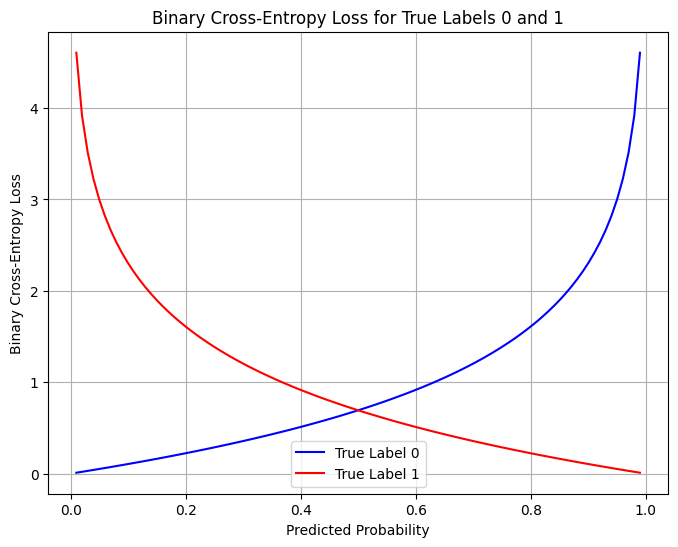

In [122]:
import numpy as np
import matplotlib.pyplot as plt

def binary_cross_entropy(p, y):
    """
    Compute the binary cross-entropy loss between the true labels and the predicted probabilities.

    Arguments:
    p -- Predicted probability (scalar or numpy array)
    y -- True label (0 or 1)

    Returns:
    bce -- Binary cross-entropy loss
    """
    epsilon = 1e-15  # to avoid log(0) which is undefined
    p = np.clip(p, epsilon, 1 - epsilon)  # clip probabilities to avoid log(0)
    bce = - (y * np.log(p) + (1 - y) * np.log(1 - p))
    return bce

# Generate predicted probabilities in the range [0, 1]
predicted_probabilities = np.linspace(0.01, 0.99, 100)

# True labels (binary)
true_labels_0 = np.zeros_like(predicted_probabilities)
true_labels_1 = np.ones_like(predicted_probabilities)

# Compute binary cross-entropy loss for true label 0
bce_losses_0 = binary_cross_entropy(predicted_probabilities, true_labels_0)

# Compute binary cross-entropy loss for true label 1
bce_losses_1 = binary_cross_entropy(predicted_probabilities, true_labels_1)

# Plotting the binary cross-entropy losses
plt.figure(figsize=(8, 6))
plt.plot(predicted_probabilities, bce_losses_0, label='True Label 0', color='blue')
plt.plot(predicted_probabilities, bce_losses_1, label='True Label 1', color='red')
plt.title('Binary Cross-Entropy Loss for True Labels 0 and 1')
plt.xlabel('Predicted Probability')
plt.ylabel('Binary Cross-Entropy Loss')
plt.grid(True)
plt.legend()
plt.show()


In [ ]:
true_labels_1

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [ ]:
predicted_probs = np.array([0.2, 0.3, 0.1, 0.2, 0.2])

true_labels_one_hot = np.array([0., 0., 1., 0., 0.])

bce=[]

for i in range(len(true_labels_one_hot)):

    ce=true_labels_one_hot[i]*np.log(predicted_probs[i])+(1-true_labels_one_hot[i])*np.log((1-predicted_probs[i]))
    bce.append(-ce)
np.mean(bce)

0.6657381381750814

In [ ]:
bce_list = binary_cross_entropy(predicted_probs,true_labels_one_hot)

bce_list

array([0.22314355, 0.35667494, 2.30258509, 0.22314355, 0.22314355])

In [ ]:
np.mean(bce_list)

0.6657381381750814

In [ ]:
import tensorflow.keras as  keras
loss = keras.losses.binary_crossentropy(true_labels_one_hot, predicted_probs)
loss

<tf.Tensor: shape=(), dtype=float64, numpy=0.6657378346037596>

In [ ]:
np.log(np.exp(1))

1.0

In [ ]:
import torch
import torch.nn as nn

input_tensor = torch.tensor([0.2, 0.3, 0.1, 0.2, 0.2])
target_tensor = torch.tensor([0., 0., 1., 0., 0.])

# Define the Binary Cross-Entropy loss function
criterion = nn.BCELoss()

# Compute the loss
loss = criterion(input_tensor, target_tensor)

print("Binary Cross-Entropy Loss:", loss.item())


Binary Cross-Entropy Loss: 0.6657381653785706


# Attention

In [ ]:
import numpy as np

def attention_matrix(Q, K):
    """
    Compute the attention matrix between query vectors (Q) and key vectors (K).

    Arguments:
    Q -- 2-D numpy array of query vectors with shape (m, n_q)
    K -- 2-D numpy array of key vectors with shape (m, n_k)

    Returns:
    A -- Attention matrix with shape (n_q, n_k)
    """
    A = np.dot(Q, K.T)
    return A

# Example usage:
Q = np.array([[1, 2, 3],
              [4, 5, 6]])
K = np.array([[0.1, 0.2, 0.3],
              [0.4, 0.5, 0.6]])
A = attention_matrix(Q, K)
print("Attention matrix:")
print(A)


Attention matrix:
[[1.4 3.2]
 [3.2 7.7]]


# Relu

In [ ]:
import numpy as np

def relu(x):
    """
    Rectified Linear Unit (ReLU) activation function.

    Arguments:
    x -- Input value or numpy array

    Returns:
    result -- ReLU activation applied to x
    """
    return np.maximum(0, x)

# Example usage:
x = np.array([-1, 0, 1, 2, -2])
print("ReLU output:", relu(x))


ReLU output: [0 0 1 2 0]


# KL divergence

In [ ]:
import numpy as np

# Define the probability distributions P and Q
P = np.array([0.4, 0.3, 0.2, 0.1])
Q = np.array([0.1, 0.2, 0.3, 0.4])

# Compute the KL divergence from Q to P
KL_divergence = np.sum(P * np.log(P / Q))

print("KL divergence from Q to P:", KL_divergence)


KL divergence from Q to P: 0.4564348191467835


# PyTorch Loss Functions

In [89]:
# Example of target with class indices
import torch.nn as nn
input = torch.randn(3, 5, requires_grad=True)
target = torch.empty(3, dtype=torch.long).random_(5)
output = nn.CrossEntropyLoss()(input, target)
output.backward()
output

tensor(2.5841, grad_fn=<NllLossBackward0>)

In [126]:
# Example of target with class probabilities
input = torch.tensor([[9,8.6,44,0.3,5]])
print(input)
probabilities = torch.softmax(input, dim=1)
print(probabilities)

target = torch.tensor([[1.0,0,1.0,1.0,0]])
print(target)

loss = -torch.log(probabilities)*target
print('loss: '+str(torch.sum(loss)))

output = nn.CrossEntropyLoss()(input, target)
print('CrossEntropyLoss: '+ str(output))

output = nn.BCEWithLogitsLoss()(input, target)
print('BCEWithLogitsLoss: '+ str(output))

BCE=binary_cross_entropy(input, target)
print(BCE)
nll=-torch.log(torch.special.logit(input, eps=1e-6))*target
print('NLL: '+str(nll))

tensor([[ 9.0000,  8.6000, 44.0000,  0.3000,  5.0000]])
tensor([[6.3051e-16, 4.2264e-16, 1.0000e+00, 1.0503e-19, 1.1548e-17]])
tensor([[1., 0., 1., 1., 0.]])
loss: tensor(78.7000)
CrossEntropyLoss: tensor(78.7000)
BCEWithLogitsLoss: tensor(2.8323)
tensor([[   nan,    inf,    nan, 1.2040,    inf]])
NLL: tensor([[-2.6248, -0.0000, -2.6248,     nan, -0.0000]])


<ipython-input-122-58c6ce3360cb>:17: RuntimeWarning: divide by zero encountered in log
  bce = - (y * np.log(p) + (1 - y) * np.log(1 - p))


In [105]:
loss

tensor([[1.5876, 0.0000, 1.5070, 0.9577, 0.0000]], grad_fn=<MulBackward0>)

In [93]:
def custom_cross_entropy(logits, targets):
    # Apply softmax to logits
    probabilities = torch.softmax(logits, dim=1)

    # Gather the probabilities corresponding to the target classes
    target_probs = probabilities[range(len(targets)), targets]

    # Compute the negative log likelihood
    loss = -torch.log(target_probs)

    # Return mean loss
    return loss.mean()

# Example usage
custom_loss = custom_cross_entropy(input, target)
print(f"Custom Cross-Entropy Loss: {custom_loss.item()}")


IndexError: tensors used as indices must be long, int, byte or bool tensors